In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn import metrics
from tslearn.piecewise import SymbolicAggregateApproximation

In [2]:
series = np.genfromtxt('series_trace_all.csv', delimiter=',')
series

array([[-1.2967 , -1.3337 , -1.3495 , ...,  0.81928,  0.81634,  0.79434],
       [ 0.56421,  0.54512,  0.54205, ...,  0.57133,  0.58619,  0.59086],
       [-2.1008 , -2.0882 , -2.0251 , ...,  0.54294,  0.54375,  0.54387],
       ...,
       [-1.2657 , -1.2381 , -1.2569 , ...,  0.90231,  0.87317,  0.84577],
       [ 0.67424,  0.6995 ,  0.72477, ...,  0.68093,  0.61272,  0.6502 ],
       [ 0.76816,  0.71678,  0.76064, ...,  0.76741,  0.75562,  0.67906]])

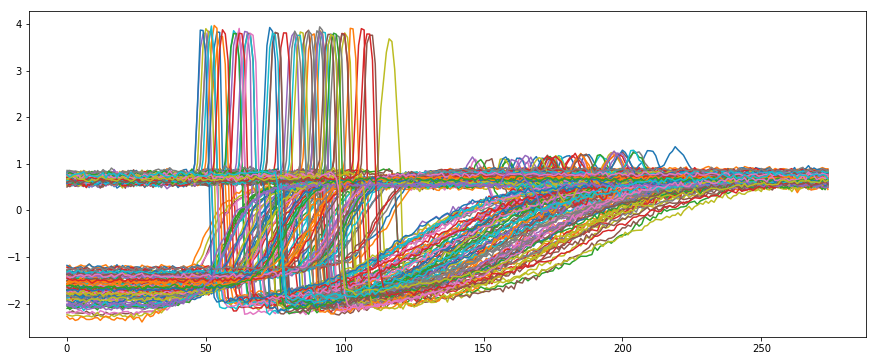

In [3]:
plt.figure(figsize=(15,6))
for s in series:
    plt.plot(s)
plt.draw()

In [4]:
# SAX transform all
n_sax_segments = 20
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, alphabet_size_avg=n_sax_symbols)
series_sax = []
for s in series:
    series_sax.append(sax.inverse_transform(sax.fit_transform(s)))

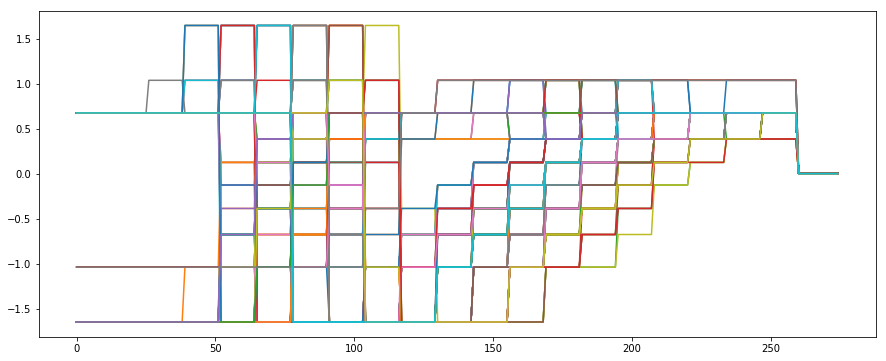

In [5]:
plt.figure(figsize=(15,6))
for i in range(len(series_sax)):
    plt.plot(series_sax[i][0])
plt.draw()

In [6]:
points_per_sax = int(len(series[0])/n_sax_segments)
series_sax_points = []
for i in range(len(series_sax)):
    sax_p = []
    for j in range(n_sax_segments):
        sax_p.append(series_sax[i][0][j*points_per_sax][0])
    series_sax_points.append(sax_p)

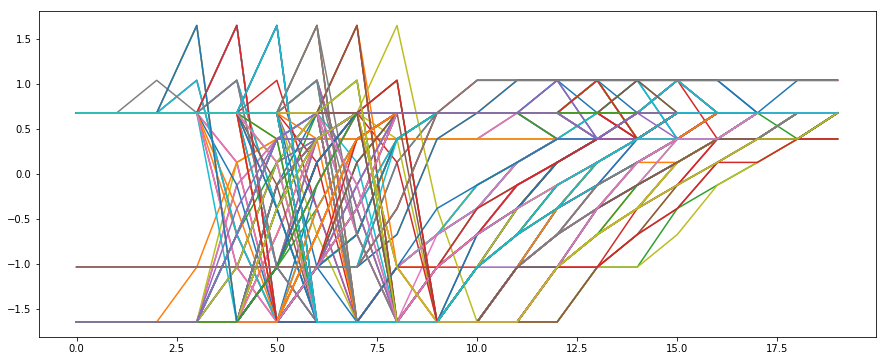

In [7]:
plt.figure(figsize=(15,6))
for s in series_sax_points:
    plt.plot(s)
plt.draw()

In [8]:
np.savetxt("series_trace_sax_all.csv", series_sax_points, delimiter=",")